In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def readFile(filename):
    contents=[]
    file1=open(filename,'r')
    for line in iter(file1):
        line=line.strip()
        contents.append(line.split(','))
    return contents

In [3]:
trainDS=readFile('../dataSet/SPECT/SPECT.train')
testDS=readFile('../dataSet/SPECT/SPECT.test')

In [60]:
datasetTrain = np.array(trainDS)
Xtp = datasetTrain[:,1:]
Ytp = datasetTrain[:,0]
Xtrain = Xtp.astype(np.int)
Ytrain = Ytp.astype(np.int) # original data:0 normal, but cluster marks it as 1, therefore change 1 to 0, and 0 to 1

In [61]:
datasetTest = np.array(testDS)
Xtp = datasetTest[:,1:]
Ytp = datasetTest[:,0]
Xtest = Xtp.astype(np.int)
Ytest = Ytp.astype(np.int)

In [36]:
from sklearn.cluster import KMeans
#Finding the optimum number of clusters for k-means classification
# n_clusters = Number of centroids to generate
# init = k-means++ = select convergence method
# max_iter = Maximum number of iterations of the k-means algorithm for a single run.
# n_init = 10 = Number of time the k-means algorithm will be run with different centroid seeds. 
# random_state = 0 = random number generator is the RandomState instance used by np.random
# inertia = Sum of squared distances of samples to their closest cluster center
# WCSS = Witchin cluster sum of squares
wcss_train = []
wcss_test = []
numcentroidsub=30
for i in range(1, numcentroidsub):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(Xtrain)
    wcss_train.append(kmeans.inertia_)
    #print(i,kmeans.inertia_)
print("  Train Data Set::     Test Data Set:")
for i in range(1, numcentroidsub):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(Xtest)
    wcss_test.append(kmeans.inertia_)
    print("%02d,  %04.8f,     %04.8f" %(i,wcss_train[i-1],kmeans.inertia_))

  Train Data Set::     Test Data Set:
01,  290.63750000,     892.31016043
02,  234.40282132,     759.31711127
03,  199.65817619,     676.58364718
04,  181.83389356,     625.18916524
05,  171.30504202,     579.35411606
06,  156.34222973,     552.05697032
07,  147.13182957,     526.13199355
08,  140.51212121,     509.71025075
09,  132.51361416,     490.06155596
10,  125.48961039,     477.42135854
11,  121.95983103,     467.10395350
12,  116.09700855,     454.08144333
13,  107.54333333,     445.10590186
14,  105.18333333,     429.48031668
15,  100.12900433,     425.95574064
16,  97.41785714,     414.29144042
17,  93.68500000,     412.36656892
18,  89.56253968,     401.65380273
19,  86.89090909,     397.29602345
20,  81.87642857,     388.18747919
21,  78.64809524,     378.16704407
22,  75.58186813,     371.12287435
23,  73.18333333,     369.25773904
24,  66.45476190,     359.13602509
25,  65.90072464,     355.79324815
26,  62.37500000,     353.48838384
27,  56.38245614,     345.45031683
28

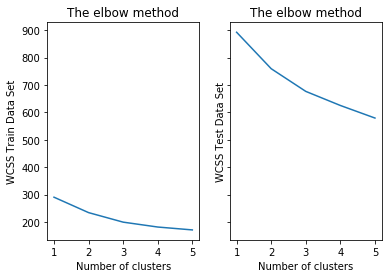

In [49]:
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(range(1, 6), wcss_train[:5])
ax1.set_title('The elbow method')
ax1.set_xlabel('Number of clusters') 
ax1.set_ylabel('WCSS Train Data Set')
ax2.plot(range(1, 6), wcss_test[:5])
ax2.set_title('The elbow method')
ax2.set_xlabel('Number of clusters')
ax2.set_ylabel('WCSS Test Data Set')
plt.show()

In [50]:
# best_n_clusters = 2
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(Xtrain)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [51]:
print(kmeans.cluster_centers_) # Centroid ccordinates

[[ 5.45454545e-01  4.09090909e-01  6.81818182e-01  5.45454545e-01
   4.09090909e-01  1.81818182e-01  6.36363636e-01  5.45454545e-01
   5.00000000e-01  4.54545455e-01  3.63636364e-01  6.36363636e-01
   7.72727273e-01  5.90909091e-01  1.81818182e-01  5.45454545e-01
   3.18181818e-01  2.72727273e-01  3.18181818e-01  4.09090909e-01
   6.81818182e-01  6.81818182e-01]
 [ 2.93103448e-01  6.89655172e-02  1.03448276e-01  8.62068966e-02
   2.58620690e-01  1.03448276e-01  1.20689655e-01  1.72413793e-01
   6.89655172e-02  2.24137931e-01  1.37931034e-01  1.03448276e-01
   1.89655172e-01  5.17241379e-02  3.44827586e-02  3.44827586e-02
   1.72413793e-02 -8.32667268e-17  1.37931034e-01  1.55172414e-01
   6.89655172e-02  1.89655172e-01]]


In [52]:
print(kmeans.labels_) # labels signifying similarity only

[1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1]


In [62]:
print(Ytrain)
Ytrain =[1 if x==0 else 0 for x in Ytrain ]
print(Ytrain)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [63]:
print(Ytest)
Ytest =[1 if x==0 else 0 for x in Ytest]
print(Ytest)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [64]:
from sklearn import metrics
print(metrics.classification_report(Ytrain, kmeans.labels_))
# 0 = normal
# 1 = abnormal


             precision    recall  f1-score   support

          0       0.91      0.50      0.65        40
          1       0.66      0.95      0.78        40

avg / total       0.78      0.72      0.71        80



In [65]:
kmeans.fit(Xtest)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [66]:
print(kmeans.cluster_centers_) # Centroid ccordinates

[[0.35964912 0.12280702 0.24561404 0.15789474 0.3245614  0.1754386
  0.13157895 0.33333333 0.22807018 0.3245614  0.16666667 0.14035088
  0.39473684 0.22807018 0.07017544 0.1754386  0.11403509 0.09649123
  0.1754386  0.16666667 0.22807018 0.33333333]
 [0.67123288 0.53424658 0.76712329 0.56164384 0.64383562 0.45205479
  0.54794521 0.73972603 0.57534247 0.56164384 0.4109589  0.5890411
  0.80821918 0.53424658 0.45205479 0.67123288 0.23287671 0.24657534
  0.42465753 0.67123288 0.71232877 0.63013699]]


In [67]:
print(kmeans.labels_) # labels signifying similarity only

[1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0
 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1
 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [68]:
print(metrics.classification_report(Ytest, kmeans.labels_))

             precision    recall  f1-score   support

          0       0.87      0.58      0.69       172
          1       0.00      0.00      0.00        15

avg / total       0.80      0.53      0.64       187

